# Clase 9 - Backpropagation

## Ejercicio 1

Dado el siguiente diagrama y asumiendo que las neuronas de salida tienen errores de 3 y 10 respectivamente, calcule el término de error (delta minúscula) simplificado para cada una de las neuronas del diagrama.

![error_simplificado](Imagenes/back-propagation-1.png)

**Capa 2**

- Delta Neurona 1: 3*(-0.23) + 10*(0.9) = 8.31
- Delta Neurona 2: 3*(0.22) + 10*(0.88) = 9.46
- Delta Neurona 3: 3*(0.77) + 10*(-0.4) = -1.69

**Capa 1**

- Delta Neurona 1: 8.31*(-0.3) + 9.46*(0.45) - 1.69*(0.69) = 0.5979
- Delta Neurona 2: 8.31*(0.62) + 9.46*(0.57) - 1.69*(0.58) = 9.5642
- Delta Neurona 3: 8.31*(0.45) + 9.46*(0.48) - 1.69*(-0.45) = 9.0408

**Capa 0 (Entradas)** 

- Delta Neurona 1: 0.5979*(0.3) + 9.5642*(0.22) + 9.0408*(0.65) = 8.16
- Delta Neurona 2: 0.5979*(0.46) + 9.5642*(-0.7) + 9.0408*(0.9) = 1.7168
- Delta Neurona 3: 0.5979*(0.02) + 9.5642*(0.65) + 9.0408*(0.34) = 9.3026


## Ejercicio 2: Entrenamiento Completo de XOR con NN

Previamente se había diseñado la fase de forward propagation de una compuerta XOR. Ahora se realiza el proceso completo de entrenamiento de una red encargada de aproximar la función XOR. Dicho aproximador debe contar con dos capas intermedias: La primera con al menos 2 neuronas y la segunda siempre con 2 neuronas. Para ambas emplear la función de activación ReLu. No acoplar ningún tipo de función de activación en la salida. Para esto se debe utilizar Numpy únicamente.

<center>
    <img src="Imagenes/XOR_nn_backprop.PNG" alt="XOR_nn" width="600px" alignment="center">
</center>

En total se deben realizar 5 experimentos. En cada experimento:

- Inicializar los parámetros aleatoriamente con distribución normal centrada en 0 y desviación estándar de 0.1.
- Retornar la representación intermedia de la segunda capa oculta.

Graficar las 5 representaciones intermedias, comparar, comentar y/o concluir.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetXOR():

    # Método: Ejecutado al crear una instancia de la clase
    def __init__(self, first_hiddenLayer_neurons = 3, seed=0) -> None:
        
        # Se setea la seed 
        np.random.seed(seed)

        # Se inicializan los pesos y biases con valores normalmente distribuidos
        # centrados en 0 y con una desviación estándar de 0.1.

        # ----------
        # CAPA 1
        # ----------
        
        # Dims X: (Nx2)
        # Dims Wc1: (2x3) o (2 Entradas x 3 Neuronas en Primera Capa Intermedia)
        # NOTA: El número de neuronas en la primera capa intermedia puede variar
        self.Wc1 = np.random.normal(loc=0, scale=0.1, size=(2, first_hiddenLayer_neurons))

        # Bias de capa 1
        self.Bc1 = np.random.normal(loc=0, scale=0.1, size=(1, first_hiddenLayer_neurons))

        # ----------
        # CAPA 2
        # ----------

        # Dims Wc2: (3x2) o (3 Neuronas en Primera Capa Intermedia x 2 Neuronas en Segunda Capa Intermedia)
        # NOTA: El número de neuronas en la primera capa intermedia puede variar
        self.Wc2 = np.random.normal(loc=0, scale=0.1, size=(first_hiddenLayer_neurons, 2))

        # Bias de capa 2
        self.Bc2 = np.random.normal(loc=0, scale=0.1, size=(1, 2))

        # ----------
        # CAPA 3
        # ----------

        # Dims Wc3: (2x1) o (2 Neuronas en Segunda Capa Intermedia x 1 Neurona de Salida)
        self.Wc3 = np.random.normal(loc=0, scale=0.1, size=(2, 1))

        # Bias de capa 3
        self.Bc3 = np.random.normal(loc=0, scale=0.1, size=(1, 1))

        # ----------
        # LOGITS
        # ----------

        # Salidas de neurona antes de pasar por la función de activación
        self.Z1 = 0
        self.Z2 = 0
        self.Z3 = 0

        # ----------
        # ACTIVACIONES
        # ----------

        # Salidas de neurona luego de pasar por la función de activación
        self.A1 = 0
        self.A2 = 0

    # Método: Forward Propagation de la Red
    def forwardProp(self, X):
        
        # Función de activación: ReLu
        ReLu = lambda x: (abs(x) + x) / 2

        # Función de activación: Lineal
        Linear = lambda x: x

        # ------------
        # FORWARD PROP
        # ------------
        
        # Dims Z1: (Nx2)(2x3) = (Nx3)
        self.Z1 = X @ self.Wc1 + self.Bc1
        self.A1 = ReLu(self.Z1)

        # Dims Z2: (Nx3)(3x2) = (Nx2)
        self.Z2 = self.A1 @ self.Wc2 + self.Bc2
        self.A2 = ReLu(self.Z2)

        # Dims Z3: (Nx2)(2x1) = (Nx1)
        self.Z3 = self.A2 @ self.Wc3 + self.Bc3
        y_pred = Linear(self.Z3)

        # Retorna la salida y las activaciones de la segunda capa
        return y_pred

    # Método: Backward Propagation de la Red
    def backwardProp(self, X, y, y_pred, lr):

        # Función de costo: MSE
        Cost = lambda y, y_pred: np.mean((y - y_pred)**2, keepdims=True)

        # Derivada de función de costo: MSE
        Cost_prime = lambda y, y_pred: -2 * np.mean(y - y_pred, axis=1, keepdims=True)

        # Derivada de función de activación: ReLu
        ReLu_prime = lambda z: (z > 0) * 1

        # Derivada de función de activación: Lineal
        Linear_prime = lambda z: 1

        # ------------
        # ERROR
        # ------------

        # Se calcula el error de la predicción y se promedia
        error = Cost(y, y_pred)

        # ------------
        # BACKWARD PROP
        # ------------

        # dC/dy: Derivada parcial del costo con respecto de las salidas de la red (y_pred)
        # Dims: (Nx1)
        dC_dy = Cost_prime(y, y_pred)

        # Delta3: dC/dy * ReLu'(Z3)
        # Dims: (Nx1) * (Nx1) = (Nx1)
        Delta3 = dC_dy * Linear_prime(self.Z3)

        # Delta2: (Wc3)(Delta3) * ReLu'(Z2)
        # Dims: (Nx1)(2x1)T * (Nx2) = (Nx2)
        Delta2 = Delta3 @ self.Wc3.T * ReLu_prime(self.Z2)

        # Delta 1: (Wc2)(Delta2) * ReLu'(Z1)
        # Dims: (Nx2)(3x2)T * (Nx3) = (Nx3)
        Delta1 = Delta2 @ self.Wc2.T * ReLu_prime(self.Z1)

        # Valores para actualizar los biases
        # dC/dB: Derivada parcial del costo respecto a los biases
        dC_dBc1 = np.mean(Delta1, axis=0, keepdims=True)            # (Nx3) -> Promediado = (1x3)
        dC_dBc2 = np.mean(Delta2, axis=0, keepdims=True)            # (Nx2) -> Promediado = (1x2)
        dC_dBc3 = np.mean(Delta3, axis=0, keepdims=True)            # (Nx1) -> Promediado = (1x1)

        # Valores para actualizar los pesos
        # dC/dW: Derivada parcial del costo respecto de los pesos
        dC_dWc1 =       X.T @ Delta1              # (Nx2)T (Nx3) = (2x3) = Dims Wc1
        dC_dWc2 = self.A1.T @ Delta2              # (Nx3)T (Nx2) = (3x2) = Dims Wc2
        dC_dWc3 = self.A2.T @ Delta3              # (Nx2)T (Nx1) = (2x1) = Dims Wc3

        # Se actualizan los pesos usando line search
        self.Wc1 = self.Wc1 - lr * dC_dWc1
        self.Wc2 = self.Wc2 - lr * dC_dWc2
        self.Wc3 = self.Wc3 - lr * dC_dWc3

        # Se actualizan los biases usando line search
        self.Bc1 = self.Bc1 - lr * dC_dBc1
        self.Bc2 = self.Bc2 - lr * dC_dBc2
        self.Bc3 = self.Bc3 - lr * dC_dBc3

        return error

    # Método: Entrenar a la Red Neuronal
    def fit(self, X, y, epsilon=0.01, max_iter=200, lr=0.0001, verbose=True):
        
        # Historial del error del modelo
        error_historial = []

        # Inicialmente el error es infinito
        error = np.Inf

        # El número de iteración se inicializa en 0
        iter = 0

        # Mientras el error sea mayor al epsilon deseado o no se haya alcanzado 
        # el número máximo de iteraciones
        while (error > epsilon) and (iter < max_iter):

            # Se realiza el paso de forward propagation
            y_pred = self.forwardProp(X)

            # Se actualizan los pesos utilizando backward propagation
            error = self.backwardProp(X, y, y_pred, lr)

            # Se incrementa el número de iteración
            iter += 1

            # Se agrega un elemento al historial de errores
            error_historial.append(error.item())

            # Imprimir cada cierta cantidad de iteraciones
            if (iter % 10 == 0) and verbose:
                print(f"Iteración: {iter} | Error: {error}")

        print("Proceso de Entrenamiento Finalizado")
        return error_historial, self.A2

    # Método: Predecir utilizando los parámetros entrenados
    def predict(self, X): 
        
        # Se retornan los resultados obtenidos al realizar un forward pass
        return self.forwardProp(X)

### Experimento 1

- Seed: 40
- Neuronas en Primera Capa Oculta: 3
- Learning Rate: 0.001
- Precisión: 0.01
- Iteraciones Máx: 1000

Proceso de Entrenamiento Finalizado


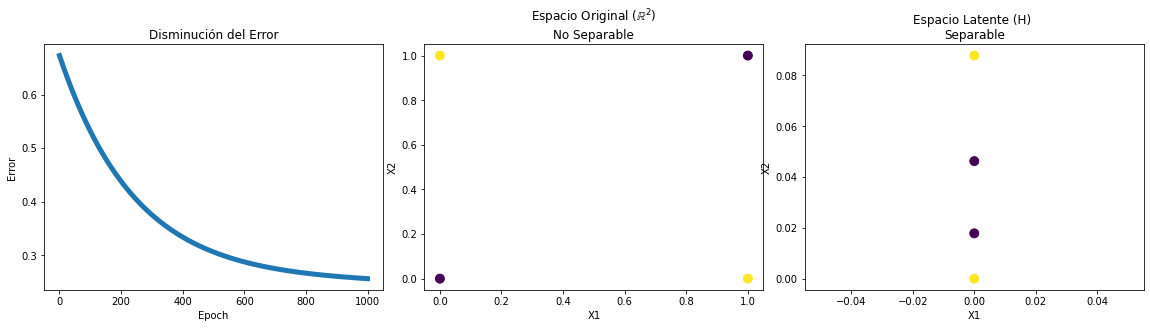

,Input 1,Input 2,Output Real,Output Predicho,Correcto
0,0.0,0.0,0.0,0.415127,1.0
1,0.0,1.0,1.0,0.424464,0.0
2,1.0,0.0,1.0,0.404752,0.0
3,1.0,1.0,0.0,0.408736,1.0


In [13]:
# Tabla de verdad de XOR
# Entradas del XOR
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

# Salidas del XOR
y = np.array([[0, 1, 1, 0]]).T

# ======================
# ENTRENAMIENTO
# ======================

# Modelo y entrenamiento de red neuronal
nn = NeuralNetXOR(first_hiddenLayer_neurons=30, seed=40)
error, A2 = nn.fit(X, y, lr=0.001, max_iter=1000, epsilon=0.01, verbose=False)

# Predicción de la red neuronal
y_hat = nn.predict(X)

# ======================
# GRÁFICAS
# ======================

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(16, 4)
fig.tight_layout()

# Subplot 1: Plot error
axs[0].plot(error, linewidth=5)
axs[0].set_title("Disminución del Error")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Error")

# Subplot 2: Plot de espacio original
axs[1].scatter(X[:,0], X[:,1], c=y, s=80)
axs[1].set_title('Espacio Original ($\mathbb{R}^2$) \nNo Separable')
axs[1].set_xlabel("X1")
axs[1].set_ylabel("X2")

# Subplot 3: Plot de espacio latente
axs[2].scatter(A2[:,0], A2[:,1], c=y, s=80)
axs[2].set_title('Espacio Latente (H) \nSeparable')
axs[2].set_xlabel("X1")
axs[2].set_ylabel("X2")

plt.show()

# ======================
# TABLA DE VERDAD
# ======================

# Se concatenan los datos en un array y se convierten a un dataframe
DataArray = np.hstack((X, y, y_hat, y == np.around(y_hat)))
df = pd.DataFrame(DataArray, columns=['Input 1', ' Input 2', 'Output Real', 'Output Predicho', 'Correcto'])

# Se presentan los resultados de la predicción
df

Al observar los resultados obtenidos, se puede determinar que el modelo fue únicamente capaz de aproximar correctamente la mitad de las salidas. Los datos restantes no pudieron ser separados linealmente en la segunda capa intermedia, por lo que la neurona de salida no generó una aproximación apropiada. A pesar de todo esto, el error parece estar alcanzando un mínimo, por lo que se extenderá el número de iteraciones y se verá si esto trae mejoras.

### Experimento 2

- Seed: 40
- Neuronas en Primera Capa Oculta: 3
- Learning Rate: 0.001
- Precisión: 0.01
- Iteraciones Máx: 3000

Proceso de Entrenamiento Finalizado


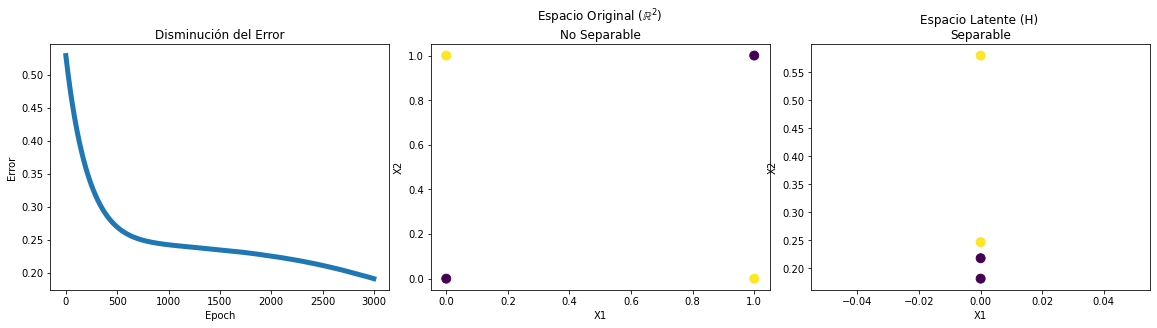

,Input 1,Input 2,Output Real,Output Predicho,Correcto
0,0.0,0.0,0.0,0.467839,1.0
1,0.0,1.0,1.0,0.487110,0.0
2,1.0,0.0,1.0,0.709921,1.0
3,1.0,1.0,0.0,0.443490,1.0


In [15]:
# ======================
# ENTRENAMIENTO
# ======================

# Modelo y entrenamiento de red neuronal
nn = NeuralNetXOR(first_hiddenLayer_neurons=30)
error, A2 = nn.fit(X, y, lr=0.001, max_iter=3000, epsilon=0.01, verbose=False)

# Predicción de la red neuronal
y_hat = nn.predict(X)

# ======================
# GRÁFICAS
# ======================

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(16, 4)
fig.tight_layout()

# Subplot 1: Plot error
axs[0].plot(error, linewidth=5)
axs[0].set_title("Disminución del Error")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Error")

# Subplot 2: Plot de espacio original
axs[1].scatter(X[:,0], X[:,1], c=y, s=80)
axs[1].set_title('Espacio Original ($\mathbb{R}^2$) \nNo Separable')
axs[1].set_xlabel("X1")
axs[1].set_ylabel("X2")

# Subplot 3: Plot de espacio latente
axs[2].scatter(A2[:,0], A2[:,1], c=y, s=80)
axs[2].set_title('Espacio Latente (H) \nSeparable')
axs[2].set_xlabel("X1")
axs[2].set_ylabel("X2")

plt.show()

# ======================
# TABLA DE VERDAD
# ======================

# Se concatenan los datos en un array y se convierten a un dataframe
DataArray = np.hstack((X, y, y_hat, y == np.around(y_hat)))
df = pd.DataFrame(DataArray, columns=['Input 1', ' Input 2', 'Output Real', 'Output Predicho', 'Correcto'])

# Se presentan los resultados de la predicción
df

Justo como se esperaba, luego de incrementar el número de iteraciones máximas el error consiguió disminuir aún más, lo que indica que durante el experimento 1 se había alcanzado un mínimo local. El modelo parece haber conseguido que los puntos fueran linealemente separables en el espacio latente, pero la neurona final no fue capaz de generar un modelo lineal adecuado (aunque si consigiuó mejorar la precisión del modelo a 75%). Se continuará incrementando el número máximo de iteraciones para observar lo que sucede.

### Experimento 3

- Seed: 40
- Neuronas en Primera Capa Oculta: 3
- Learning Rate: 0.001
- Precisión: 0.01
- Iteraciones Máx: 5000

Proceso de Entrenamiento Finalizado


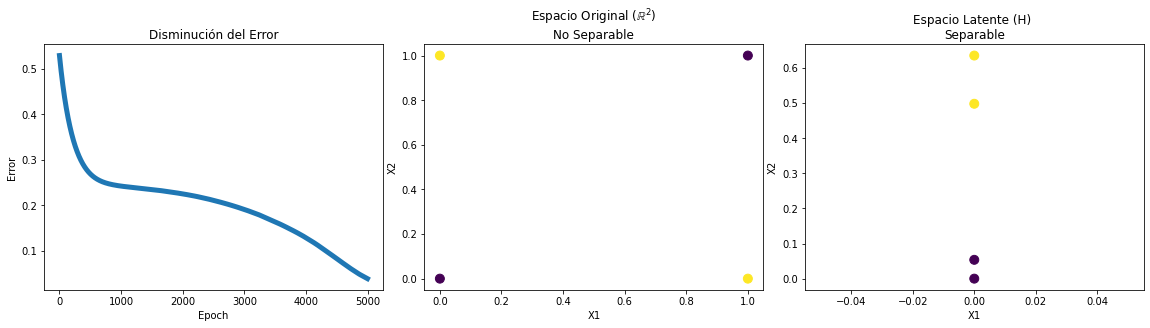

,Input 1,Input 2,Output Real,Output Predicho,Correcto
0,0.0,0.0,0.0,0.260792,1.0
1,0.0,1.0,1.0,0.790323,1.0
2,1.0,0.0,1.0,0.953486,1.0
3,1.0,1.0,0.0,0.197131,1.0


In [16]:
# ======================
# ENTRENAMIENTO
# ======================

# Modelo y entrenamiento de red neuronal
nn = NeuralNetXOR(first_hiddenLayer_neurons=30)
error, A2 = nn.fit(X, y, lr=0.001, max_iter=5000, epsilon=0.01, verbose=False)

# Predicción de la red neuronal
y_hat = nn.predict(X)

# ======================
# GRÁFICAS
# ======================

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(16, 4)
fig.tight_layout()

# Subplot 1: Plot error
axs[0].plot(error, linewidth=5)
axs[0].set_title("Disminución del Error")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Error")

# Subplot 2: Plot de espacio original
axs[1].scatter(X[:,0], X[:,1], c=y, s=80)
axs[1].set_title('Espacio Original ($\mathbb{R}^2$) \nNo Separable')
axs[1].set_xlabel("X1")
axs[1].set_ylabel("X2")

# Subplot 3: Plot de espacio latente
axs[2].scatter(A2[:,0], A2[:,1], c=y, s=80)
axs[2].set_title('Espacio Latente (H) \nSeparable')
axs[2].set_xlabel("X1")
axs[2].set_ylabel("X2")

plt.show()

# ======================
# TABLA DE VERDAD
# ======================

# Se concatenan los datos en un array y se convierten a un dataframe
DataArray = np.hstack((X, y, y_hat, y == np.around(y_hat)))
df = pd.DataFrame(DataArray, columns=['Input 1', ' Input 2', 'Output Real', 'Output Predicho', 'Correcto'])

# Se presentan los resultados de la predicción
df

Luego de incrementar aún más el número de iteraciones máximo, se puede observar que el algoritmo eventualmente alcanzará algún tipo de mínimo global que aproximará de manera casi perfecta la compuerta XOR (actualmente las predicciones son correctas, pero únicamente si se toma que 0.8 es lo suficientemente cercano a 1). No obstante, el proceso de entrenamiento está tomando demasiadas iteraciones para alcanzar el mínimo global. Para acelerar el proceso de entrenamiento se incrementará el learning rate y se observará si tasa de convergencia mejora.

### Experimento 4

- Seed: 40
- Neuronas en Primera Capa Oculta: 3
- Learning Rate: 0.01
- Precisión: 0.01
- Iteraciones Máx: 5000

Proceso de Entrenamiento Finalizado


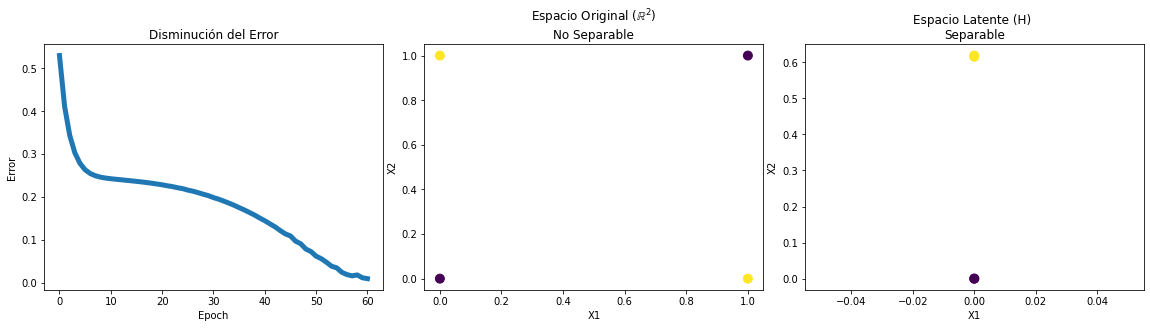

,Input 1,Input 2,Output Real,Output Predicho,Correcto
0,0.0,0.0,0.0,0.122442,1.0
1,0.0,1.0,1.0,0.985028,1.0
2,1.0,0.0,1.0,1.016501,1.0
3,1.0,1.0,0.0,0.128314,1.0


In [18]:
# ======================
# ENTRENAMIENTO
# ======================

# Modelo y entrenamiento de red neuronal
nn = NeuralNetXOR(first_hiddenLayer_neurons=30)
error, A2 = nn.fit(X, y, lr=0.1, max_iter=5000, epsilon=0.01, verbose=False)

# Predicción de la red neuronal
y_hat = nn.predict(X)

# ======================
# GRÁFICAS
# ======================

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(16, 4)
fig.tight_layout()

# Subplot 1: Plot error
axs[0].plot(error, linewidth=5)
axs[0].set_title("Disminución del Error")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Error")

# Subplot 2: Plot de espacio original
axs[1].scatter(X[:,0], X[:,1], c=y, s=80)
axs[1].set_title('Espacio Original ($\mathbb{R}^2$) \nNo Separable')
axs[1].set_xlabel("X1")
axs[1].set_ylabel("X2")

# Subplot 3: Plot de espacio latente
axs[2].scatter(A2[:,0], A2[:,1], c=y, s=80)
axs[2].set_title('Espacio Latente (H) \nSeparable')
axs[2].set_xlabel("X1")
axs[2].set_ylabel("X2")

plt.show()

# ======================
# TABLA DE VERDAD
# ======================

# Se concatenan los datos en un array y se convierten a un dataframe
DataArray = np.hstack((X, y, y_hat, y == np.around(y_hat)))
df = pd.DataFrame(DataArray, columns=['Input 1', ' Input 2', 'Output Real', 'Output Predicho', 'Correcto'])

# Se presentan los resultados de la predicción
df

Luego de un incremento agresivo al learning rate, el modelo consigue mejorar aún más sus predicciones al generar una mejor separación en el espacio latente. El modelo se acerca cada vez a su valor ideal de salidas binarias (unos y ceros), pero no progresa más allá de la iteración 60, ya que se alcanza la precisión deseada. Se incrementará la precisión y se observarán los resultados. 

Proceso de Entrenamiento Finalizado


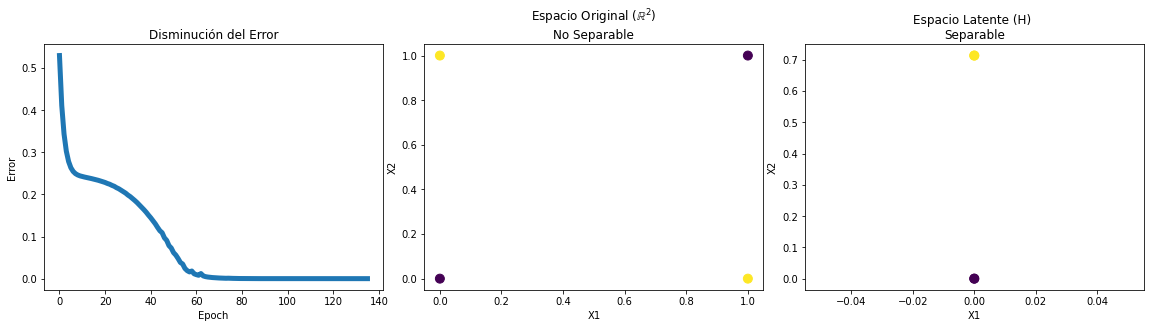

,Input 1,Input 2,Output Real,Output Predicho,Correcto
0,0.0,0.0,0.0,0.000122,1.0
1,0.0,1.0,1.0,0.999988,1.0
2,1.0,0.0,1.0,0.999998,1.0
3,1.0,1.0,0.0,0.000122,1.0


In [23]:
# ======================
# ENTRENAMIENTO
# ======================

# Modelo y entrenamiento de red neuronal
nn = NeuralNetXOR(first_hiddenLayer_neurons=30)
error, A2 = nn.fit(X, y, lr=0.1, max_iter=5000, epsilon=0.00000001, verbose=False)

# Predicción de la red neuronal
y_hat = nn.predict(X)

# ======================
# GRÁFICAS
# ======================

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(16, 4)
fig.tight_layout()

# Subplot 1: Plot error
axs[0].plot(error, linewidth=5)
axs[0].set_title("Disminución del Error")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Error")

# Subplot 2: Plot de espacio original
axs[1].scatter(X[:,0], X[:,1], c=y, s=80)
axs[1].set_title('Espacio Original ($\mathbb{R}^2$) \nNo Separable')
axs[1].set_xlabel("X1")
axs[1].set_ylabel("X2")

# Subplot 3: Plot de espacio latente
axs[2].scatter(A2[:,0], A2[:,1], c=y, s=80)
axs[2].set_title('Espacio Latente (H) \nSeparable')
axs[2].set_xlabel("X1")
axs[2].set_ylabel("X2")

plt.show()

# ======================
# TABLA DE VERDAD
# ======================

# Se concatenan los datos en un array y se convierten a un dataframe
DataArray = np.hstack((X, y, y_hat, y == np.around(y_hat)))
df = pd.DataFrame(DataArray, columns=['Input 1', ' Input 2', 'Output Real', 'Output Predicho', 'Correcto'])

# Se presentan los resultados de la predicción
df

Luego de incrementar la precisión lo suficiente, el algoritmo alcanza una predicción virtualmente perfecta. Tomando en cuenta todos los experimentos pasados, se puede llegar a observar que el primer mínimo encontrado consistía de un valor local que únicamente asignaba una salida de 0.5 a todas las entradas. Una vez se extendió el tiempo de entrenamiento lo suficiente y se ajustaron los hiperparámetros restantes, se consiguió alcanzar un valor óptimo que fue capaz de no solo separar los puntos en el espacio latente, si no que también fue capaz de generar un modelo lineal que clasifica correctamente dichos puntos. Se podría experimentar incrementando el número de neuronas, pero este modelo, aunque simple, parece ser suficiente.